<a href="https://colab.research.google.com/github/IlTACK-OH/Section1_project/blob/main/Section1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section1 Project
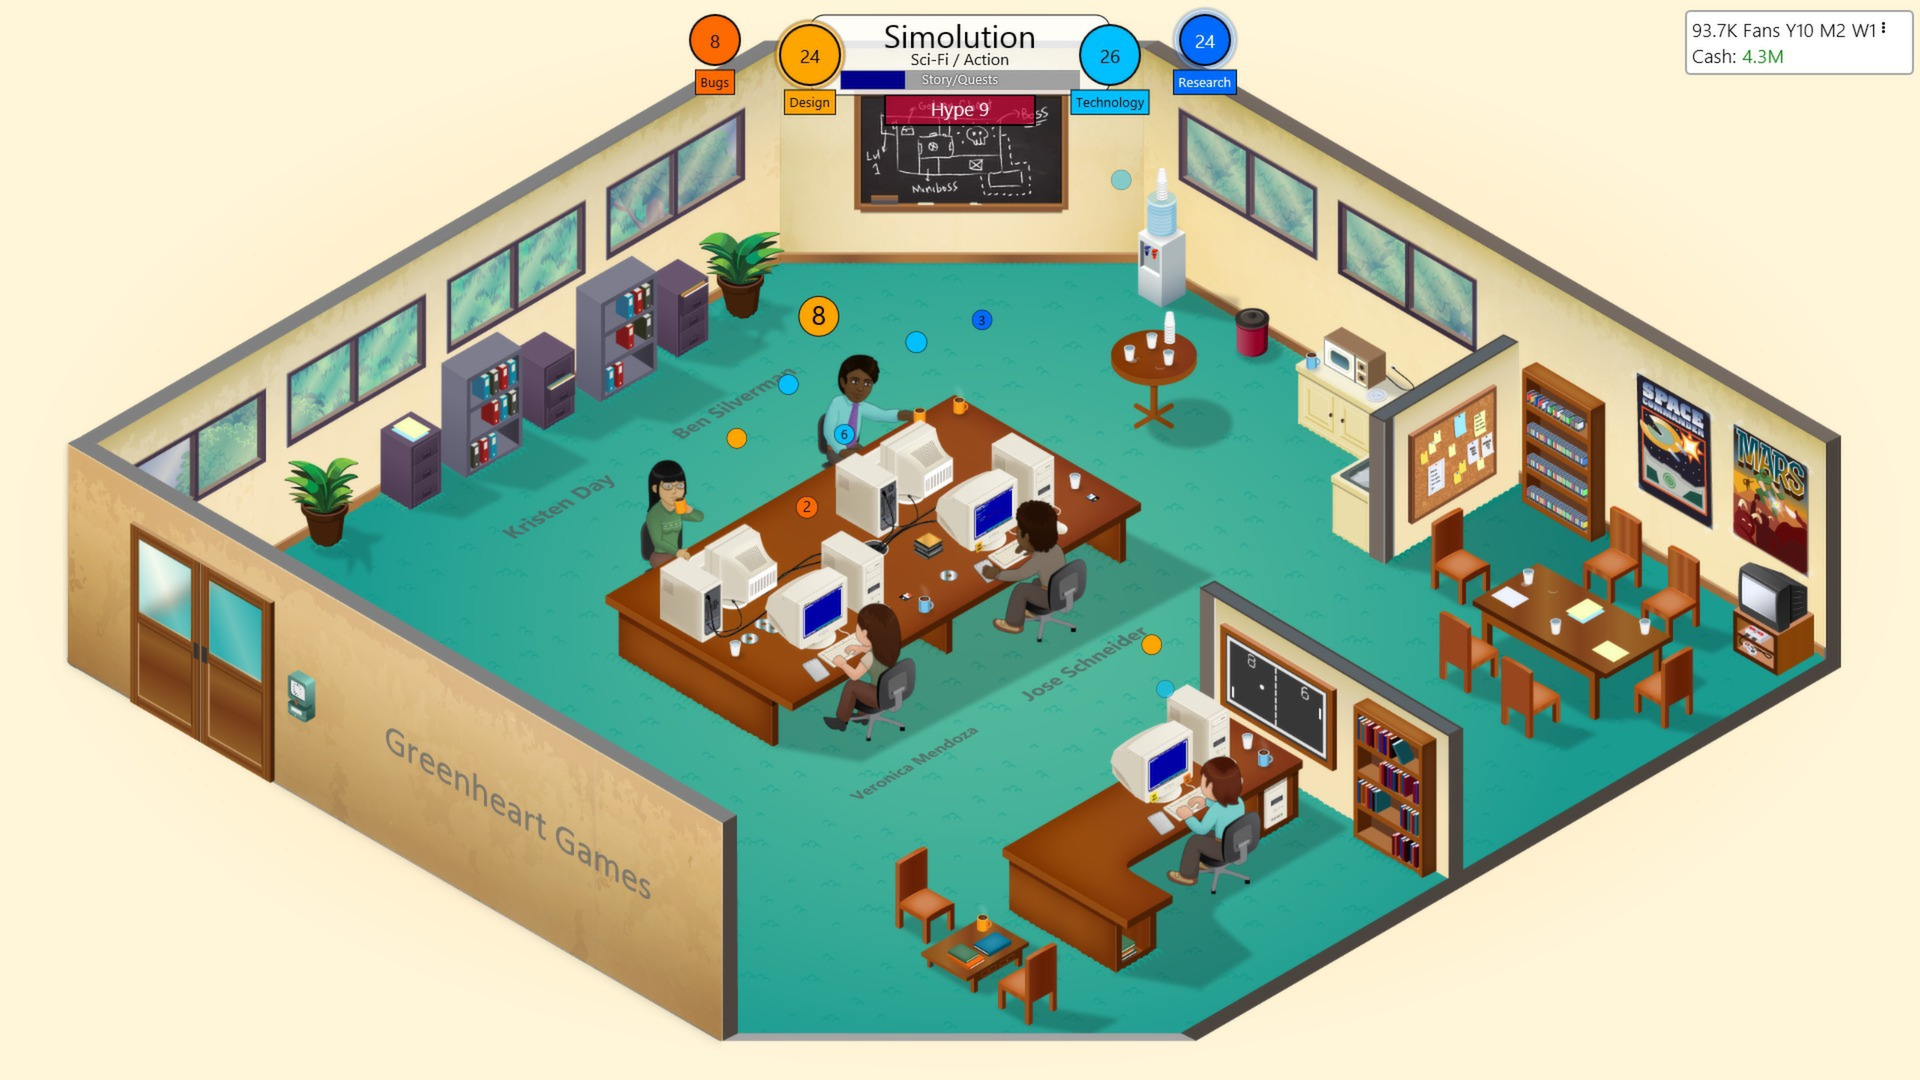
> **"다음 분기에 어떤 게임을 설계해야 할까?"**

기존의 데이터에 기반하여 인사이트를 얻고, 어떤 게임을 다음 분기에 설계하여야 하는지, 의사결정을 진행하여라.

---


> 🔔 반드시 포함되어야할 내용
1. 지역에 따라서 선호하는 게임의 장르가 다른가?
2. 연도별 게임의 트렌드가 있을까?
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

---



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as sps

In [2]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2.csv


## 1. Data Wrangling & EDA

In [128]:
df = pd.read_csv('vgames2.csv')

In [129]:
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [130]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [108]:
df.head(3)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0


In [109]:
df.shape

(16598, 9)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [111]:
df.Year.describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [112]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [113]:
df.duplicated().sum()

1

- 중복값 제거
- Year의 경우 이상치가 존재한다. 따라서 이를 확인하고 조치해야함.
- Year의 data type은 `int`가 적절하다고 판단된다.
- 판매 국가 범주화.
- Sales양을 float 형식으로 변환
---
<br>

### 1-1. 중복치 제거

In [131]:
df = df.drop_duplicates()

In [132]:
df.duplicated().sum()

0

In [152]:
df.shape

(16597, 9)

중복값이 제대로 제거됨을 확인할 수 있다.

---
<br>

### 1-2. "`Year`" 이상치 및 결측치 처리 
- 세계최초의 컴퓨터 게임은 1958년에 제작된 "Tennies of to"<br>
하지만 Year에서 최솟값이 0으로 이상치가 존재함을 알 수 있다.<br>
따라서 이를 확인해보아야 한다.

In [150]:
df[df.Year < 1958].shape

(100, 9)

100개의 이상치가 존재한다.

In [151]:
Year_flo = df[df.Year < 1958].Year

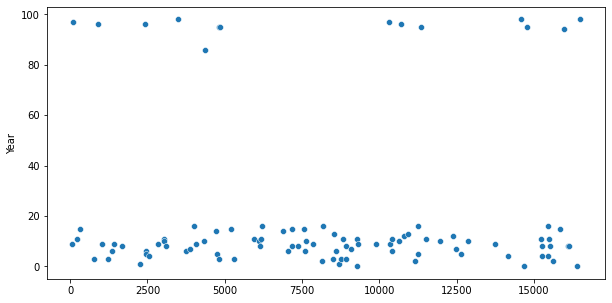

In [153]:
plt.figure(figsize=(10,5))
sactter_plt = sns.scatterplot(data=Year_flo)

위 그래프를 통하여 Year의 앞자리가 표시되지 않은 것을 미루어 짐작할 수 있다.<br>따라서 80보다 높은 년도는 1900년대라고 생각하고, 그 이후는 2000년대라고 생각한다.<br>이를 확인해보기 위하여 실제 몇몇 데이터들을 통해 해당 게임이 언제 출시되었는지 검색을 진행하여 본다.

In [154]:
df[(df.Year>80)&(df.Year<100)].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
906,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96.0,Racing,ASCII Entertainment,0,0,0.9,0
2429,Casper,PS,96.0,Adventure,Interplay,0.46,0.31,0,0.05
3492,Glover,N64,98.0,Platform,Hasbro Interactive,0.72,0.17,0,0.01
4365,Adventure Island,NES,86.0,Platform,Hudson Soft,0,0,1.05,0


- Treasures of the Deep	: 1997년출시
- Mini-Yonku Shining Scorpion: Let's & Go!! : 1996년 출시
- Casper : 1996년 출시
- Glover : 1998년 출시
- Adventure Island : 1986년출시<br>
<br>이를 통하여 데이터 입력시에 앞의 년도를 누락하고 작성했다는 것을 파악할 수 있다. 따라서 이 부분을 채워주도록한다.

In [155]:
New_Year=[]
for i,j in enumerate(df.Year):
  if (j>80)&(j<100):
    New_Year.append(j+1900)
  elif (j<=22)&(j>=0):
    New_Year.append(j+2000)
  else:
    New_Year.append(j)

In [156]:
df_sub = df.copy()

In [157]:
df_sub.Year = New_Year

In [158]:
df_sub.Year.describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [159]:
df_sub[df_sub.Year < 1958]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


이상치들이 정상적으로 입력되었음을 확인할 수 있다.<br>

In [160]:
df_sub.Year = df_sub.Year.astype('str')

In [161]:
df_sub.Year = df_sub.Year.str.extract('(\d+)')

In [162]:
df_sub.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2028,Luigi's Mansion: Dark Moon,3DS,2013,Action,Nintendo,1.78,1.39,1.1,0.3
15714,Pirates of the Caribbean: At World's End,X360,2007,Action,Disney Interactive Studios,0.29,0.02,0,0.03
13831,Big Mutha Truckers 2,PS2,2005,Racing,Xplosiv,0.1,0.07,0,0.03
3467,School Days LxH,PS2,2008,Adventure,Interchannel,0,0,0.02,0
13666,Crazy Taxi,GC,2001,Racing,Acclaim Entertainment,0.36,0.09,0.02,0.01


In [163]:
df_sub.Year.isnull().sum()

270

In [164]:
df_sub.dropna(axis=0,subset=['Year'],inplace=True)

In [165]:
df_sub = df_sub.reset_index(drop=True)
df_sub.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
16322,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16323,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16324,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16325,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03
16326,The King of Fighters '95,PS,1996,Fighting,Sony Computer Entertainment,0,0,0.16,0.01


In [166]:
df_sub.Year = df_sub.Year.astype('int') # year의  data type은 object보다 integer가 더 적절함.

년도에 결측치가 있는 270개의 데이터를 삭제하였다.<br>
이는 전체 데이터의 약 1.6%로, 삭제를 진행하여도 데이터 분석 결과에 큰 영향을 미치지 않을 것으로 판단하여 삭제하였다.

----

In [167]:
df = df_sub.copy() #수정된 데이터를 다시 원본으로 저장.

In [168]:
df_sub = df.copy()

In [169]:
df_sub.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

---
### 1-3. Genre 결측치처리

 `Genre`는 이번 데이터 분서에서 중요한 요소이다.<br>
 그리고 50개 정도의 비교적 적은 양의 결측치를 가지므로, 이를 채워준다.

In [170]:
Gen_null_idx=df_sub[df_sub.Genre.isnull()].index # 추후 값 입력을 위한 인덱스 저장

In [171]:
df_sub.Genre.unique() # Genre 분류확인

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [172]:
Gen_null_data = np.array(['Platform','Sports','Sports','Action','Role-Playing',
                 'Racing','Action','Action','Sports','Fighting',
                 'Adventure','Sports','Action','Puzzle','Fighting',
                 'Misc','Role-Playing','Role-Playing','Adventure','Role-Playing',
                 'Strategy','Action','Sports','Action','Racing',
                 'Role-Playing','Adventure','Adventure','Simulation','Simulation',
                 'Action','Platform','Racing','Shooter','Adventure',
                 'Sports','Adventure','Strategy','Puzzle','Adventure',
                 'Action','Platform','Racing','Shooter','Action',
                 'Role-Playing','Puzzle','Racing','Action','Racing'])

In [173]:
df_sub.loc[Gen_null_idx,'Genre'] = Gen_null_data

In [174]:
df_sub.loc[Gen_null_idx].sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
9348,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,1.88,0,2.33,1.74
3462,Princess Saver! Eternal Love for My Lady,PS2,2010,Adventure,Comfort,0,0,0.02,0
2460,Jurassic Park III: Island Attack,GBA,2001,Action,Konami Digital Entertainment,0.13,0.05,0,0
16284,Apache: Air Assault,PC,2010,Action,Just Flight,0,0.03,0,0.01
11480,The History Channel: Battle for the Pacific,Wii,2007,Shooter,Activision,0.1,0,0,0.01
2017,NASCAR Racing,PS,1996,Racing,Pioneer LDC,0.23,0.16,0,0.03
13135,Treasure Report: Kikai Jikake no Isan,DS,2011,Action,Namco Bandai Games,0,0,0.05,0
4855,Astonishia Story,PSP,2006,Role-Playing,Ubisoft,0.03,0,0,0
3301,The Godfather: Dons Edition,PS3,2007,Action,Electronic Arts,0.25,0.02,0,0.03
7031,Largo Winch .// Commando Sar,PS,2002,Action,Ubisoft,0.01,0.01,0,0


결측치 값이 잘 입력된 것을 확인할 수 있다.

---

In [175]:
df = df_sub.copy()

In [176]:
df_sub = df.copy()

In [177]:
df_sub.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher      36
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

---
### 1-4. "`Publisher`"결측치 처리

이 역시 결측치 값이 36개로 그 수가 많지 않다.<br>
하지만 이번 분석에 있어서 Publisher은 크게 중요하지 않다.<br>
따라서, 결측치는 `Unknown`으로 처리한다. 

In [178]:
df_sub.Publisher  = df_sub.Publisher.fillna('Unknown')

In [179]:
df_sub.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

결측치가 모두 Unknown으로 대체되었다.

---

In [180]:
df = df_sub.copy()

In [181]:
df_sub = df.copy()

---

### 1-5. 데이터 구조의 문제

각 변수는 하나의 열을 구성하여야 한다.<br>
Raw data의 경우 각 지역에서의 판매량이 하나의 컬럼을 구성하여 4개의 컬럼을 구성하고 있다.<br><br>
이를 판매지역(=`Country`), 판매량(=`Sales`)으로 나누어 데이터 구조를 개선하여 준다.

In [182]:
df_sub = pd.melt(df_sub,id_vars=['Name','Platform','Year','Genre','Publisher'],
                 value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
                 var_name= 'Country',value_name='Sales')

In [183]:
df_sub.Country = df_sub.Country.replace({'NA_Sales':'North America','EU_Sales':'EU','JP_Sales':'Japan',
                                         'Other_Sales':'Other'})

In [184]:
df_sub = df_sub.sort_values(by=['Name','Year']).reset_index(drop=True)

In [189]:
df_sub.head(10)

,Name,Platform,Year,Genre,Publisher,Country,Sales
0,'98 Koshien,PS,1998,Sports,Magical Company,North America,0.15
1,'98 Koshien,PS,1998,Sports,Magical Company,EU,0.1
2,'98 Koshien,PS,1998,Sports,Magical Company,Japan,0.12
3,'98 Koshien,PS,1998,Sports,Magical Company,Other,0.03
4,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,North America,0
5,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,EU,0
6,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,Japan,0.17
7,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,Namco Bandai Games,Other,0
8,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,North America,0.11
9,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,Namco Bandai Games,EU,0.09


---

In [190]:
df = df_sub.copy()

In [191]:
df_sub = df.copy()

---

### 1-6. "`Sales`"이상치 처리

In [192]:
df_sub.Sales.sample(5)

24231    0.06
12465    0.01
32717    0.03
61200    0.25
39645    0.02
Name: Sales, dtype: object

데이터를 살펴보면 뒤에 문자로 끝나는 `Sales`값으로 인하여 object형식으로 저장된 것을 알 수 있다.<br>
 따라서 문자열로 끝나는 것들을 찾아서 수정하여 준다.<br>
 이떄, 기준을 찾아야한다. K가 의미하는 것이 몇장인지 지금 소수점의 자릿수는 몇장인지 찾아낼 필요가 있다.<br>이를 알아내기 위하여 "Poketmon X/PoketmonY"의 판매량을 기준으로 선정하였다.

In [193]:
df_sub[df_sub.Name=='Pokemon X/Pokemon Y']

,Name,Platform,Year,Genre,Publisher,Country,Sales
41400,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,North America,5170K
41401,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,EU,4.05
41402,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,Japan,4.34
41403,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,Other,0.79


포켓몬은 현재까지 약 1,600만장이 판매되었다.<Br>
이 데이터가 최신 데이터가 아니라는 가정하에 기본 단위는 백만장. K는 천장으로 보는 것이 타당하다.<br>
그리고 이에 따라서 M은 백만장을 의미한다.

In [194]:
def has_err_K(x):
  return bool(re.search('[K]',x))

def has_err_M(x):
  return bool(re.search('[M]',x))

In [195]:
def re_sub_K(x):
  pat = re.compile('(\d+[.]?)([K])')
  return pat.sub('\g<1>',x)

def re_sub_M(x):
  pat = re.compile('(\d+[.]?)([M])')
  return pat.sub('\g<1>',x)

In [196]:
data_K = df_sub[df_sub.Sales.apply(has_err_K)].Sales
clean_data_K = data_K.apply(re_sub_K).astype('int')
clean_data_K = clean_data_K*0.001
K_data_index = clean_data_K.index

data_M = df_sub[df_sub.Sales.apply(has_err_M)].Sales
clean_data_M = data_M.apply(re_sub_M).astype('float')
clean_data_M = clean_data_M*1.000
M_data_index = clean_data_M.index

In [197]:
df_sub.loc[K_data_index,'Sales'] = clean_data_K
df_sub.loc[M_data_index,'Sales'] = clean_data_M
df_sub.Sales = df_sub.Sales.astype('float')

In [198]:
df_sub.loc[M_data_index].head()

,Name,Platform,Year,Genre,Publisher,Country,Sales
61,007: Quantum of Solace,Wii,2008,Action,Activision,Japan,0.01
87,1 vs. 100,DS,2008,Misc,DSI Games,Other,0.01
166,18 Wheeler: American Pro Trucker,PS2,2001,Racing,Acclaim Entertainment,Japan,0.00
247,2002 FIFA World Cup,PS2,2002,Sports,Electronic Arts,Other,0.06
337,4 Elements,PC,2009,Puzzle,Mastertronic,EU,0.04


In [199]:
df_sub.loc[K_data_index].head()

,Name,Platform,Year,Genre,Publisher,Country,Sales
85,1 vs. 100,DS,2008,Misc,DSI Games,EU,0.00
217,2 Games in 1: Sonic Pinball Party & Columns Crown,GBA,2005,Misc,Sega,EU,0.02
366,4x4 EVO 2,XB,2001,Racing,Gathering of Developers,Japan,0.00
378,50 Cent: Blood on the Sand,X360,2009,Shooter,THQ,EU,0.07
446,7th Dragon 2020-II,PSP,2013,Role-Playing,Sega,Japan,0.13


In [200]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65308 entries, 0 to 65307
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       65308 non-null  object 
 1   Platform   65308 non-null  object 
 2   Year       65308 non-null  int64  
 3   Genre      65308 non-null  object 
 4   Publisher  65308 non-null  object 
 5   Country    65308 non-null  object 
 6   Sales      65308 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.5+ MB


`Sales`의 데이터가 `float`형식으로 올바르게 변환되었음을 알 수 있다.

---

In [201]:
df = df_sub.copy()

In [202]:
df_sub = df.copy()

In [203]:
df_sub[df_sub.duplicated()]

,Name,Platform,Year,Genre,Publisher,Country,Sales
30371,Madden NFL 13,PS3,2012,Sports,Electronic Arts,Japan,0.0


중복치가 새롭게 발견되었다. 왜 발생되었는지 살펴보고 적절한 조치를 취하여 준다.

In [204]:
df_sub[(df_sub.Name=='Madden NFL 13')&(df_sub.Platform=='PS3')]

,Name,Platform,Year,Genre,Publisher,Country,Sales
30358,Madden NFL 13,PS3,2012,Sports,Electronic Arts,North America,2.11
30359,Madden NFL 13,PS3,2012,Sports,Electronic Arts,North America,0.00
30364,Madden NFL 13,PS3,2012,Sports,Electronic Arts,EU,0.23
30365,Madden NFL 13,PS3,2012,Sports,Electronic Arts,EU,0.01
30370,Madden NFL 13,PS3,2012,Sports,Electronic Arts,Japan,0.00
30371,Madden NFL 13,PS3,2012,Sports,Electronic Arts,Japan,0.00
30376,Madden NFL 13,PS3,2012,Sports,Electronic Arts,Other,0.22
30377,Madden NFL 13,PS3,2012,Sports,Electronic Arts,Other,0.00


데이터에서 `Madden NFL 13`이 입력될 때 2번에 나뉘어서 입력되어진 것 같다.<br>두 데이터를 합하여 값을 대입하고 중복된 행을 제거하여 준다.

---

### 2-1. 필수 포함내용(1번, 2번)
> "지역에 따라서 선호하는 게임의 장르는 다른가?"

위 가설을 통계적으로 검증하기 위하여 다음과 같이 가설을 설정한다.<br> 
> $\mu_0$: 지역에 따라 선호하는 게임의 장르는 다르지 않다.<br>
$\mu_1$: 지역에 따라 선호하는 게임의 장르는 다르다.

가설 검증 방법으로는 **`카이제곱 독립성검정`**방법을 사용한다.<br>
유의 수준은 0.05로 한다.

In [63]:
NA_sales = df_sub.query('Country =="North America"').groupby('Genre').Sales.sum()
EU_sales = df_sub.query('Country =="EU"').groupby('Genre').Sales.sum()
JP_sales = df_sub.query('Country =="Japan"').groupby('Genre').Sales.sum()
Oth_sales = df_sub.query('Country =="Other"').groupby('Genre').Sales.sum()

In [64]:
Sales_df = pd.DataFrame([NA_sales,EU_sales,JP_sales,Oth_sales],
                        index=['North America','EU','Japan','Other']).T
Sales_df

,North America,EU,Japan,Other
Genre,,,,
Action,859.59,514.84,157.75,184.78
Adventure,103.05,64.25,53.10,16.86
Fighting,220.81,100.02,87.15,36.19
Misc,402.08,213.73,106.67,73.42
Platform,446.34,201.19,130.65,51.73
Puzzle,121.87,50.48,56.24,12.46
Racing,356.95,236.32,56.61,76.68
Role-Playing,327.50,188.34,350.55,59.74
Shooter,575.16,310.45,38.18,101.90


In [65]:
sps.chi2_contingency(Sales_df)[1]

2.2849002212508275e-123

In [66]:
P_value =[]
for j in range(3):
  for i in range(4):
    if i+1>3:
      pass
    elif j>=i+1:
      pass
    else:
      value = sps.chi2_contingency(Sales_df.iloc[:,[j,i+1]])[1]
      P_value.append(value)
print(f'- 카이제곱 독립성검증 결과 -\n North America & EU : {P_value[0]}\n',
      f'North America & Japan : {P_value[1]}\n North America & Other : {P_value[2]}\n',
      f'EU & Japan : {P_value[3]}\n EU & Other : {P_value[4]}\n Japan & Other : {P_value[5]}')

- 카이제곱 독립성검증 결과 -
 North America & EU : 0.03244305312561451
 North America & Japan : 1.4774107182749716e-107
 North America & Other : 0.03394633012541317
 EU & Japan : 8.292438397583932e-87
 EU & Other : 0.7526896526655724
 Japan & Other : 1.02464369405615e-53


결과를 살펴보면 기본적으로는 
 `EU & Other`을 제외하고는 `P-value`가 모두 0.05보다 낮으므로 대립가설을 채택할 수 있다.<br><br>
`EU & Other`는 귀무가설을 기각할 수 없다. 즉, 두 나라 사이에 선호하는 게임의 장르는 크게 다르지 않다.

In [67]:
ideal_df = pd.DataFrame(sps.chi2_contingency(Sales_df)[3],index= Sales_df.index,
             columns=['North America','EU','Japan','Other'])

In [68]:
Sales_df['Type'] = 'real'
ideal_df['Type'] = 'ideal'
concat_df = pd.concat([Sales_df,ideal_df])

<function matplotlib.pyplot.show(*args, **kw)>

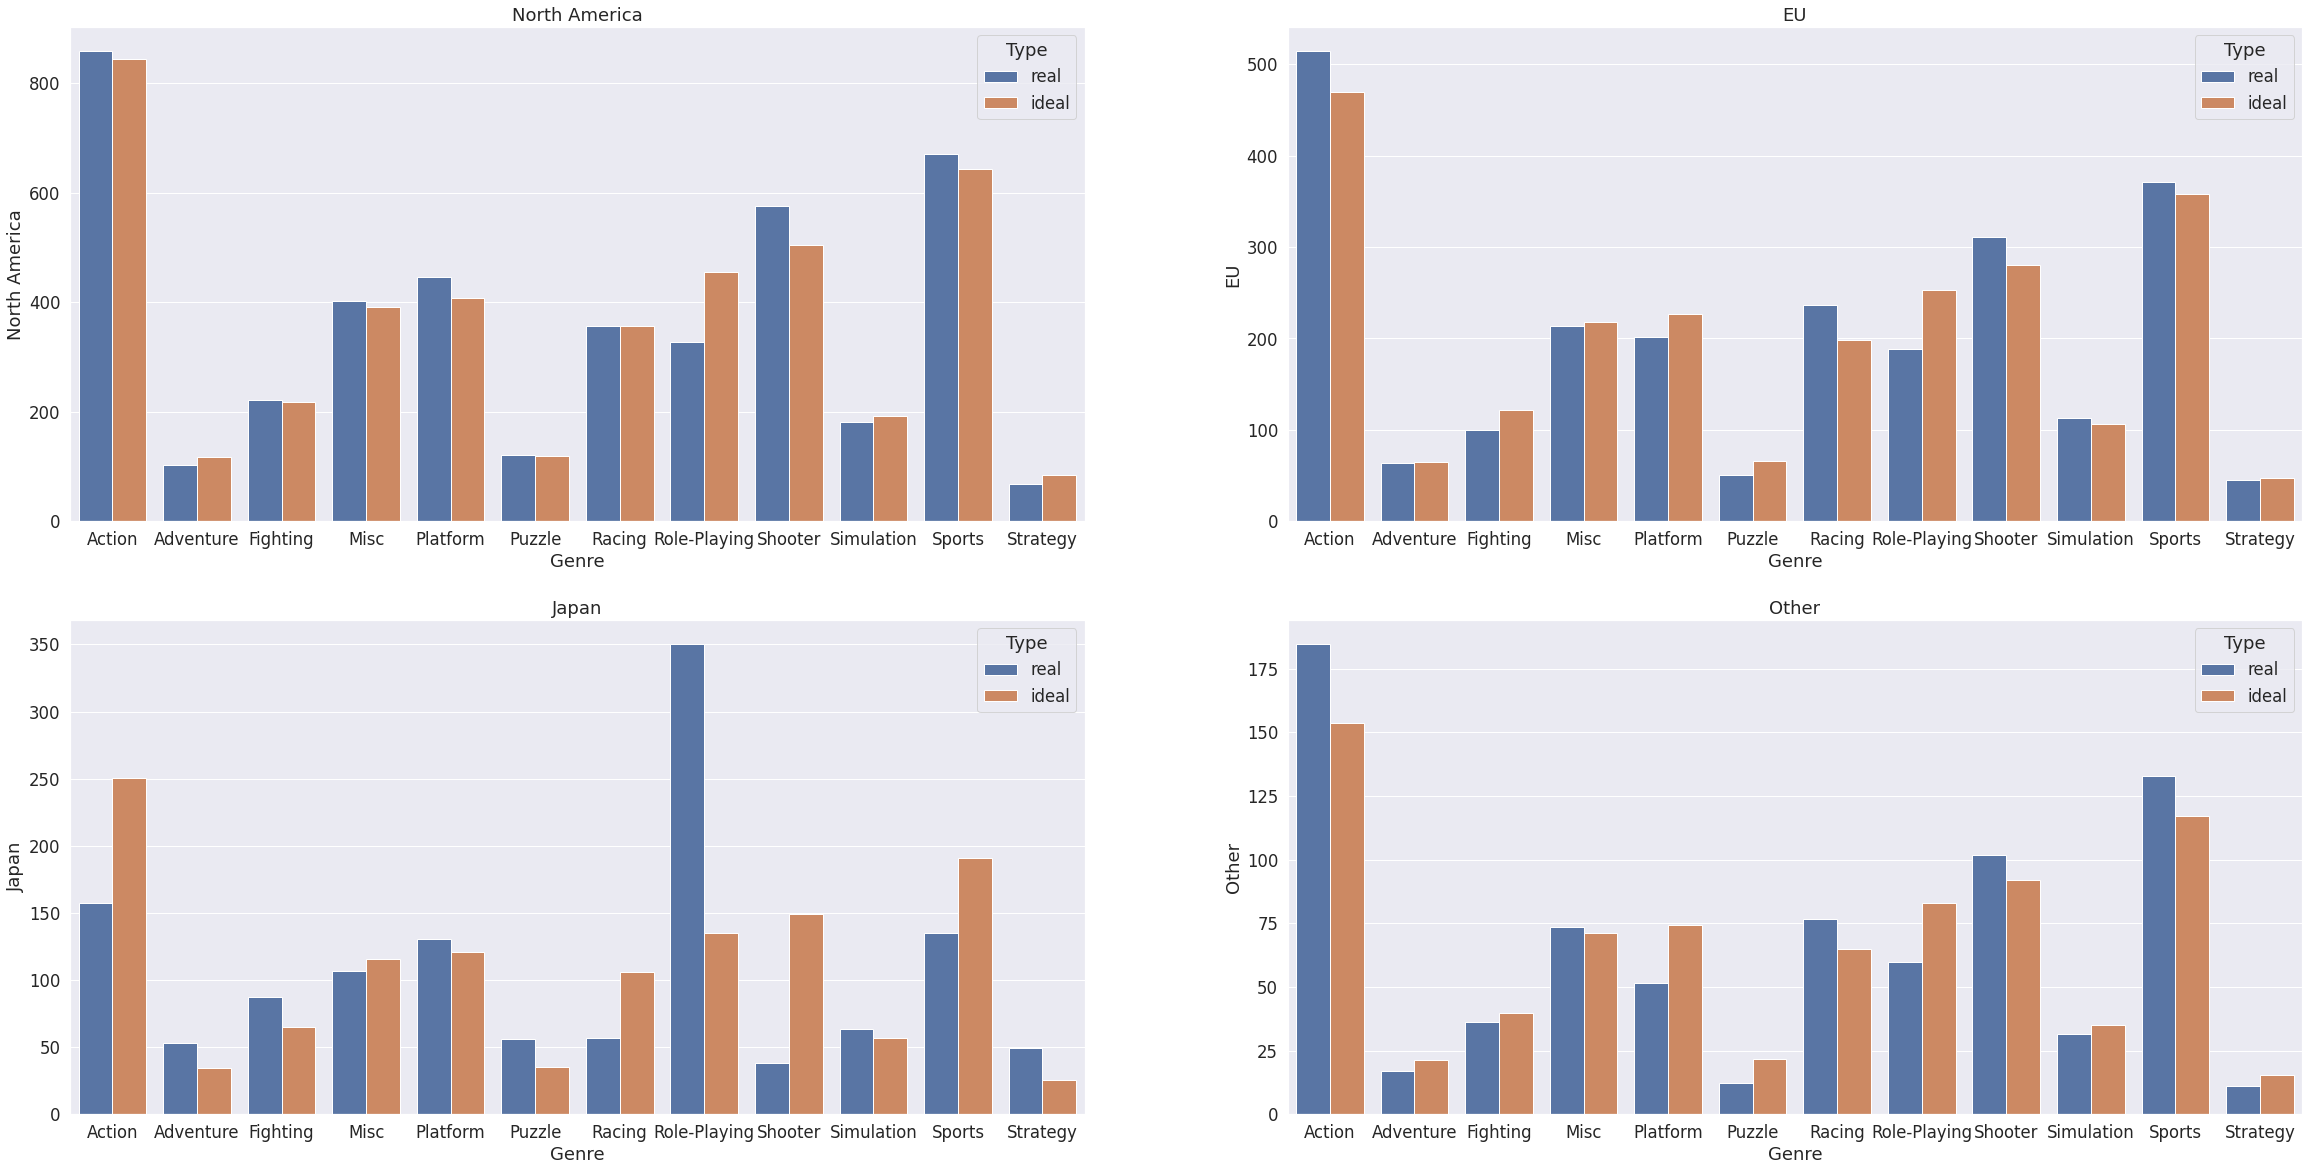

In [69]:
fig = plt.figure(figsize=([40,20]))
y_data = concat_df.columns
sns.set(font_scale=1.5)

for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.title(y_data[i])
  sns.barplot(data=concat_df,x=concat_df.index,y=y_data[i],hue='Type')
plt.show

> **정리**<br>
결과적으로는 각 나라의 범주에 대해서 장르에 따른 선호도 차이가 존재한다.<br>
하지만, `EU`와 `other`의 경우 두 데이터에 대해서는 국가에 따른 선호도 차이가 존재하지 않는 것으로 나타난다.<br> 이는 EU라는 데이터 자체가, 다국가 표본이기 때문에 그런 것으로 사료된다.

---

> 연도별 게임 트렌드의 변화

In [118]:
bins = [1980,1990,2000,2010,2021]
label=['the 1980s','the 1990s','the 2000s','the 2010s~']
cat_year = pd.cut(df_sub.Year,bins,labels=label,right=False)

In [124]:
cat_df = pd.concat([cat_year,df_sub.Genre],axis=1)

In [126]:
cat_df = cat_df.groupby('Year').Genre.value_counts(normalize=True).unstack().fillna(0)

In [127]:
cat_df

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
the 1980s,0.321951,0.009756,0.019512,0.039024,0.160976,0.092683,0.039024,0.043902,0.146341,0.014634,0.112195,0.000000
the 1990s,0.091012,0.055399,0.109101,0.065008,0.070661,0.040136,0.103448,0.097230,0.077445,0.048615,0.171849,0.070096
the 2000s,0.172242,0.068853,0.048110,0.110882,0.061577,0.039531,0.086990,0.079496,0.078193,0.059948,0.152911,0.041268
the 2010s~,0.279689,0.105539,0.038290,0.109232,0.029543,0.022546,0.045481,0.108649,0.076774,0.040816,0.110787,0.032653


<function matplotlib.pyplot.show(*args, **kw)>

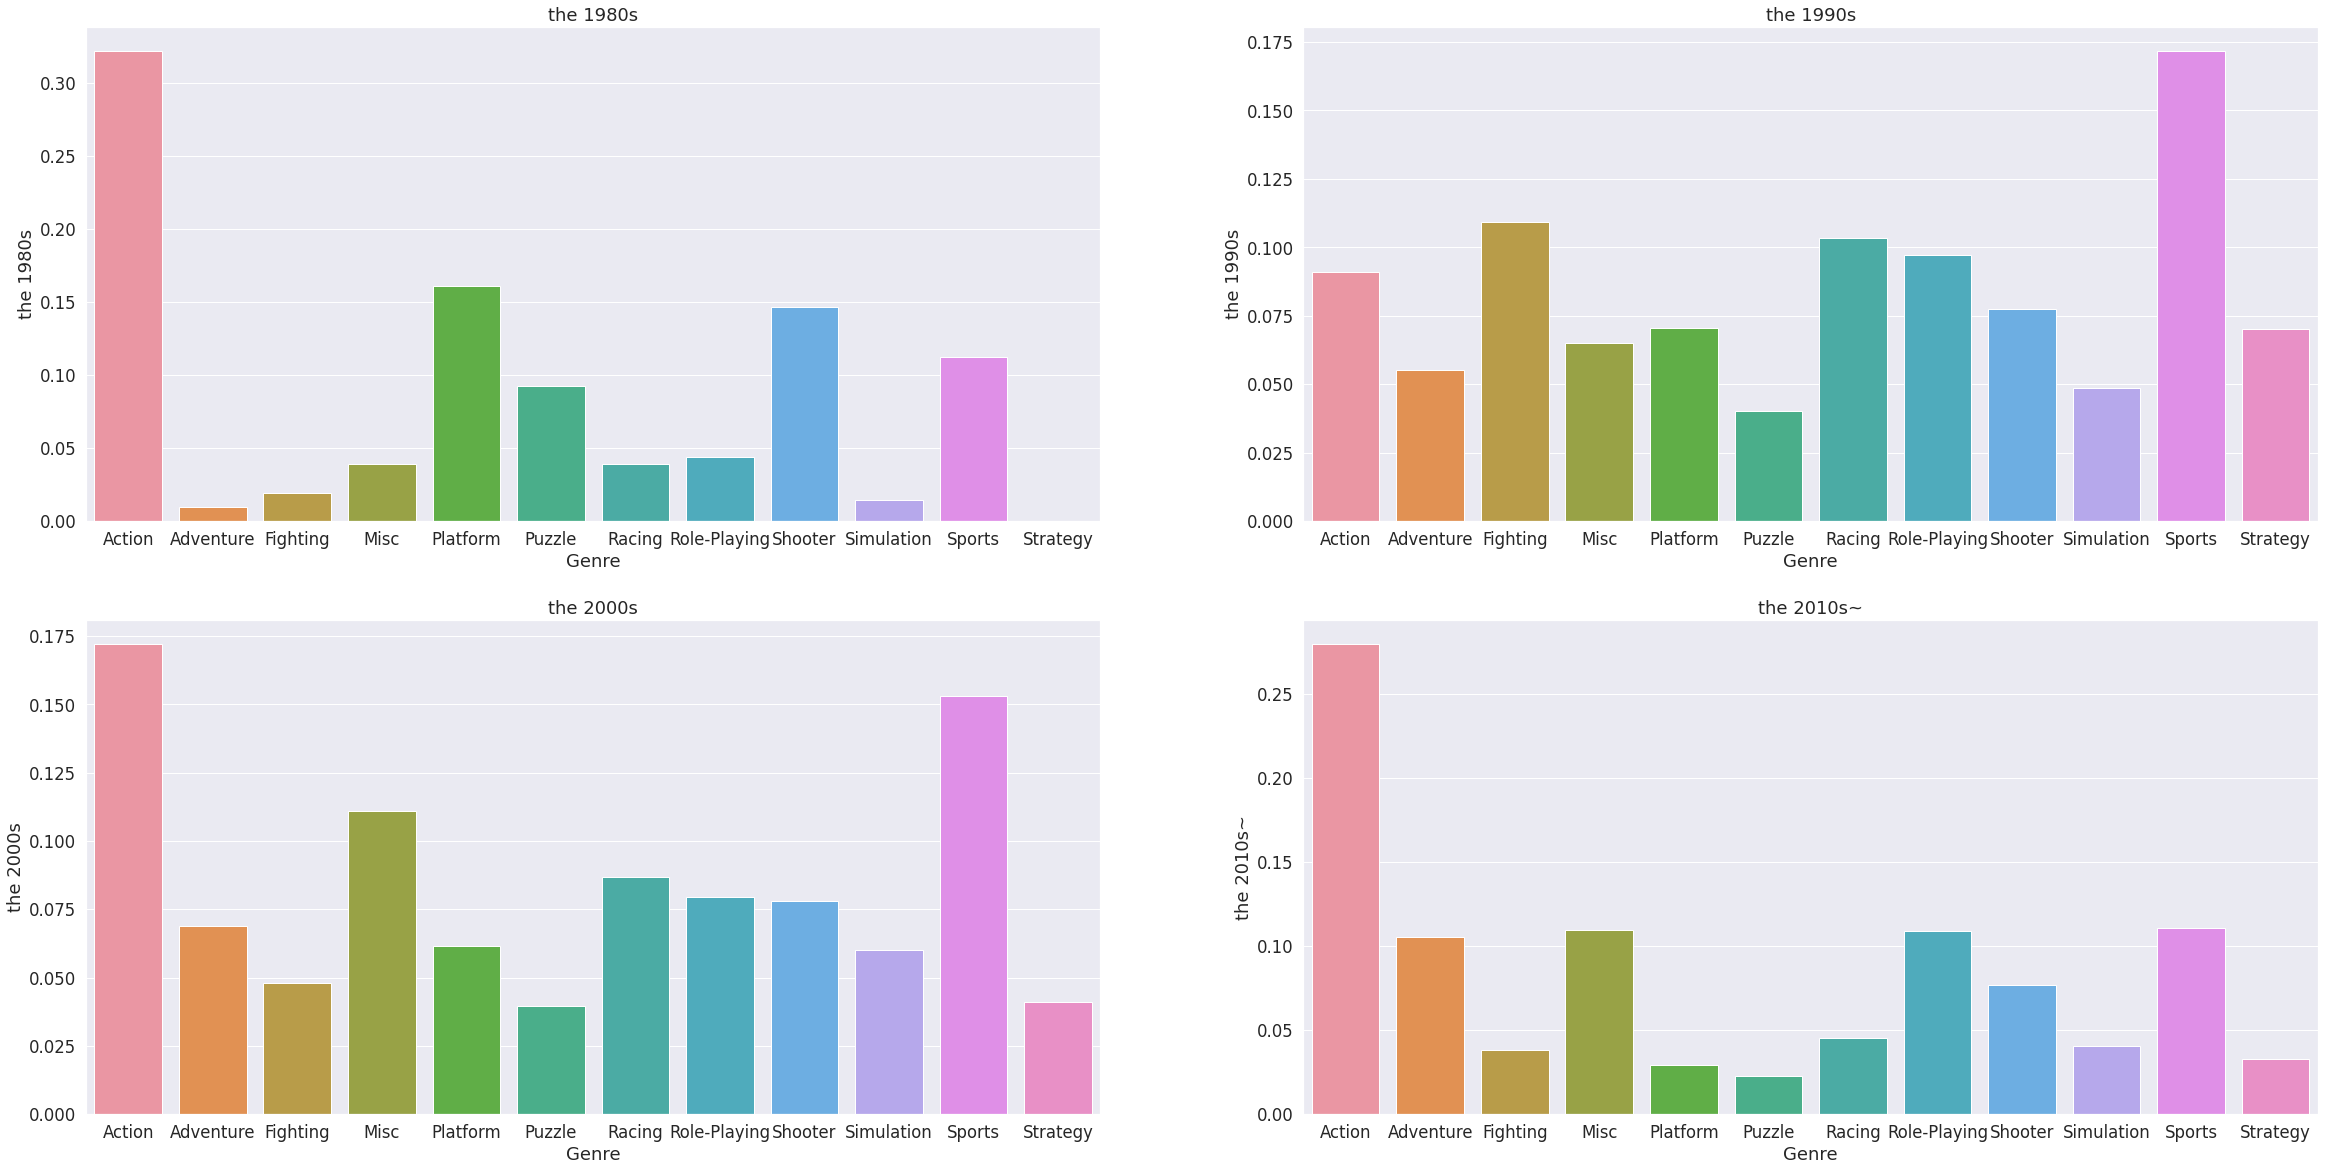

In [128]:
fig = plt.figure(figsize=([40,20]))
y_data = cat_df.index
sns.set(font_scale=1.5)

for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.title(y_data[i])
  sns.barplot(x=cat_df.columns,y=cat_df.iloc[i,:])
plt.show

In [129]:
df_sub[(df_sub.Year>=1990)&(df_sub.Year<2000)&(df_sub.Genre=='Sports')].Sales.sum()

146.47

In [130]:
df_sub[(df_sub.Year>=1990)&(df_sub.Year<2000)&(df_sub.Genre=='Action')].Sales.sum()

139.15

1990년대에는 스포츠 게임이 많이 출시되었지만, 판매량의 관점에서는 액션게임과는 큰 차이가 없음.

> 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [83]:
best_100=df_sub.groupby(['Name','Genre'],as_index=False).Sales.sum().sort_values(by='Sales',ascending=False).head(100)
best_100.Genre.value_counts()

Action          18
Shooter         17
Role-Playing    13
Sports          12
Platform        12
Racing          11
Misc             7
Puzzle           3
Simulation       3
Fighting         2
Adventure        2
Name: Genre, dtype: int64

In [84]:
best_100.groupby('Genre').Sales.sum()

Genre
Action          290.81
Adventure        22.48
Fighting         25.50
Misc            134.24
Platform        249.19
Puzzle           61.32
Racing          165.19
Role-Playing    207.35
Shooter         339.58
Simulation       52.49
Sports          272.47
Name: Sales, dtype: float64

In [85]:
best_100.groupby('Genre').Sales.sum()/best_100.Genre.value_counts()

Action          16.156111
Adventure       11.240000
Fighting        12.750000
Misc            19.177143
Platform        20.765833
Puzzle          20.440000
Racing          15.017273
Role-Playing    15.950000
Shooter         19.975294
Simulation      17.496667
Sports          22.705833
dtype: float64

In [86]:
best_100.groupby('Genre').Sales.max()

Genre
Action          55.92
Adventure       11.30
Fighting        13.04
Misc            29.01
Platform        45.31
Puzzle          35.84
Racing          35.83
Role-Playing    31.38
Shooter         30.84
Simulation      24.75
Sports          82.74
Name: Sales, dtype: float64

### 2-2. 나의 질문
> 어떤 나라의 구매력이 가장 강한가?

In [87]:
country_sales = df_sub.groupby('Country').Sales.sum()

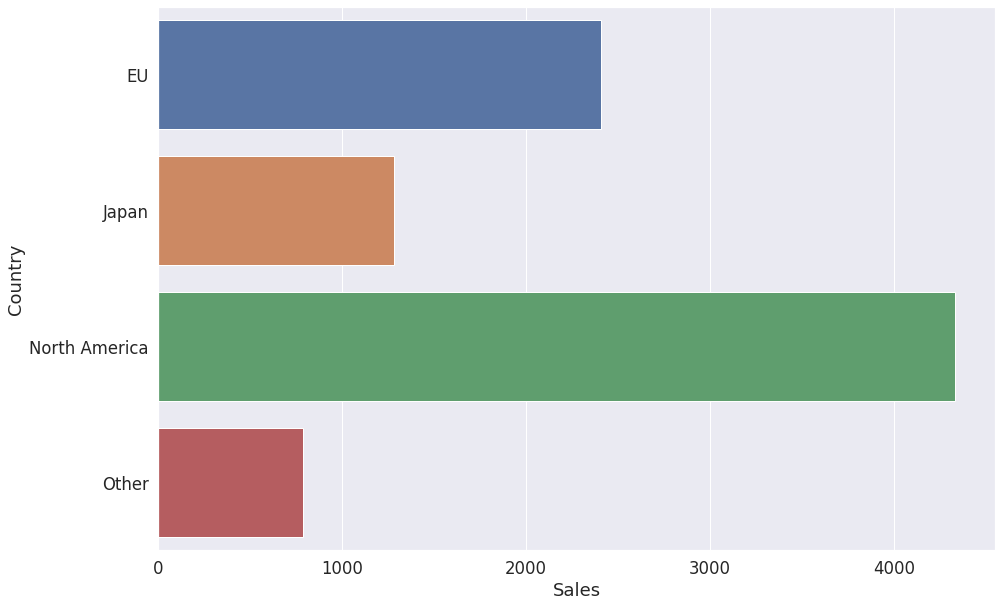

In [88]:
fig = plt.figure(figsize=([15,10]))
sns.barplot(x=country_sales,y=country_sales.index,orient='h')

미국이 가장 큰 구매력을 가지고 있다.<br>
따라서 주 target을 미국으로 한다.



---
> 어떤 장르가 좋은가?<br>

진짜 어떤게 좋을까. 일단 주 타겟은 미국으로 설정했다.<br>
출고량을 기준으로 살펴보아야한다.<br>
전체 출고량은 위에서 한 번 다루었다. 따라서 여기서는 미국에 대해서 자세히 살펴보자.

In [95]:
NA_Gen_count=df_sub[df_sub.Country=='North America'].Genre.value_counts()

In [99]:
NA_Gen_sale=df_sub[df_sub.Country=='North America'].groupby('Genre').Sales.sum()

In [161]:
NA_Gen_sale

Genre
Action          859.59
Adventure       103.05
Fighting        220.81
Misc            402.08
Platform        446.34
Puzzle          121.87
Racing          356.95
Role-Playing    327.50
Shooter         575.16
Simulation      182.02
Sports          670.12
Strategy         67.94
Name: Sales, dtype: float64

In [101]:
round(NA_Gen_sale/NA_Gen_count,2)

Action          0.26
Adventure       0.08
Fighting        0.26
Misc            0.24
Platform        0.51
Puzzle          0.21
Racing          0.29
Role-Playing    0.22
Shooter         0.45
Simulation      0.21
Sports          0.29
Strategy        0.10
dtype: float64

In [102]:
df_sub.groupby('Genre').Sales.sum()

Genre
Action          1716.96
Adventure        237.26
Fighting         444.17
Misc             795.90
Platform         829.91
Puzzle           241.05
Racing           726.56
Role-Playing     926.13
Shooter         1025.69
Simulation       390.14
Sports          1308.87
Strategy         173.22
Name: Sales, dtype: float64

In [171]:
df_sub.Genre.value_counts()/4

Action          3252.0
Sports          2305.0
Misc            1706.0
Role-Playing    1472.0
Shooter         1282.0
Adventure       1277.0
Racing          1226.0
Platform         877.0
Simulation       851.0
Fighting         837.0
Strategy         672.0
Puzzle           570.0
Name: Genre, dtype: float64

In [110]:
df_sub.groupby('Genre').Sales.sum()/(df_sub.Genre.value_counts()/4)

Action          0.527970
Adventure       0.185795
Fighting        0.530669
Misc            0.466530
Platform        0.946306
Puzzle          0.422895
Racing          0.592626
Role-Playing    0.629164
Shooter         0.800070
Simulation      0.458449
Sports          0.567839
Strategy        0.257768
dtype: float64

In [182]:
plat_sale = df_sub[df_sub.Genre == 'Platform'].groupby('Name',as_index=False).Sales.sum()
plat_sale

,Name,Sales
0,2 Games in 1: SpongeBob SquarePants: SuperSpon...,0.46
1,2-in-1 Game Pack: Spider-Man & Spider-Man 2,0.08
2,40 Winks,0.31
3,A Boy and His Blob,0.23
4,A Bug's Life,3.42
...,...,...
576,Zapper: One Wicked Cricket!,0.48
577,de Blob,0.97
578,de Blob 2,0.67
579,htoL#NiQ: The Firefly Diary,0.01


In [155]:
plat_sale[~(plat_sale.Publisher=='Nintendo')].Sales.sum()

403.76

In [156]:
plat_sale[plat_sale.Publisher=='Nintendo'].Sales.sum()

426.15

In [165]:
plat_sale[~(plat_sale.Publisher=='Nintendo')].shape[0]

498

In [177]:
plat_sale[~(plat_sale.Publisher=='Nintendo')].shape[0]

3064